# ECS 171 Bop or Flop: Data Analysis
Using exploratory data analysis to find the correlation of data and to understand the data distribution.

Dataset: Spotify Songs

30,000 Songs from the Spotify API. 

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

Read the dataset

In [45]:
dataset = pd.read_csv('spotify_songs.csv')
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

The dataset contains 22 features.

Our target variable is track_popularity.

### Distribution of All Numeric Variables

To analyze the distribution of the features we plot the numeric variables.

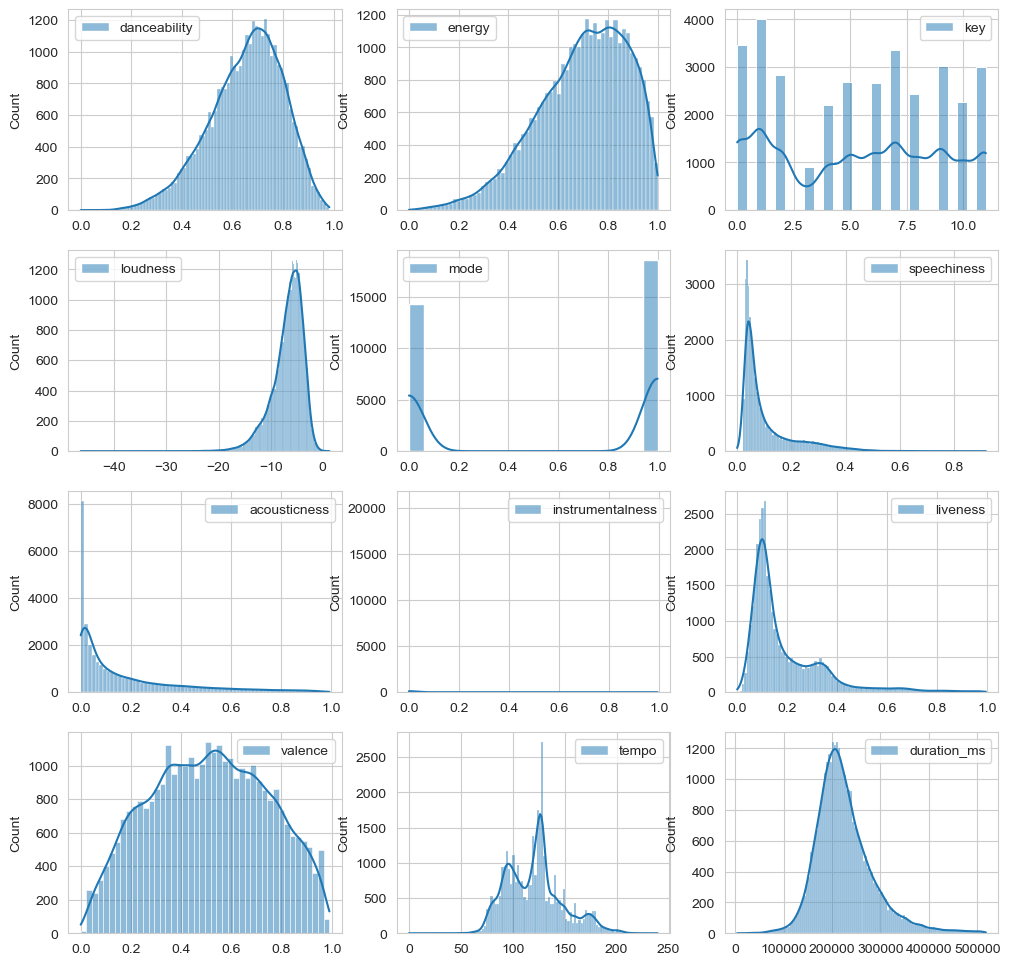

In [47]:
#dropping all nonnumeric values
data = dataset.copy().drop(columns=['track_name', 'track_id','track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'track_popularity'])

fig, axes = plt.subplots(4,3, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in data.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

### Correlation Matrix

Observing the relationship between the target and feature variables.

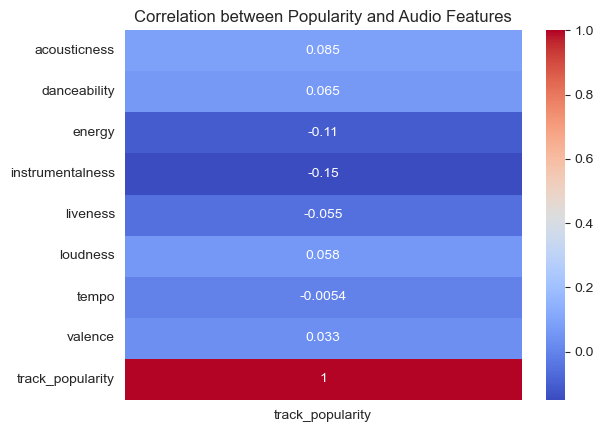

<Figure size 1000x1500 with 0 Axes>

In [48]:
# Subset the correlation matrix to include only the variables of interest
corr_matrix = dataset[['acousticness','danceability','energy','instrumentalness','liveness','loudness','tempo','valence','track_popularity']].corr()

# Create heatmap plot
sns.heatmap(corr_matrix.loc[:, ['track_popularity']], annot=True, cmap='coolwarm')

# Set plot title and figure
plt.title('Correlation between Popularity and Audio Features')
plt.figure(figsize=(10,15))

# Show plot
plt.show()

The correlations between track_popularity and the other features are weak all around.

### Popularity Analysis

Next, we plot the distribution of the target variable.

C:\Users\diego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

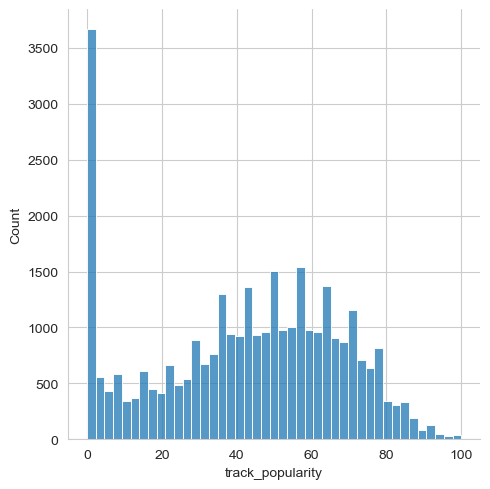

In [49]:
sns.displot(data=dataset, x='track_popularity')
dataset['track_popularity'].describe()

Popularity values range from 0 to 100.

The value 0 has the highest count with over 3500.

Popularity has a mean value of 42.47.

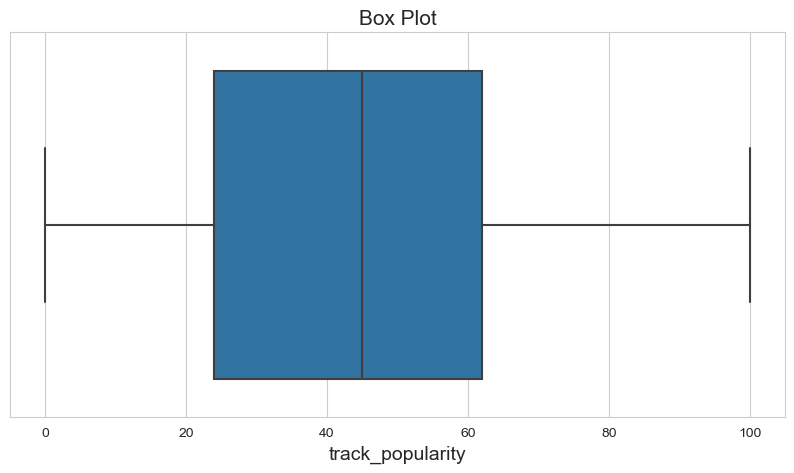

In [50]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = dataset.track_popularity, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('track_popularity', fontsize=14)
plt.show()

### Classification Threshold

Next, we apply a classification threshold to popularity.

A popularity score of above 60 will be classified as popular, below 60 will be classified as not popular.

In [51]:
#change popularity to 1 if higher than threshold, 0 otherwise
threshold_val  = 60
data = dataset.copy()
data['track_popularity'] = (data['track_popularity'] > threshold_val).astype(int)

In [52]:
data['track_popularity']

0        1
1        1
2        1
3        0
4        1
        ..
32828    0
32829    0
32830    0
32831    0
32832    0
Name: track_popularity, Length: 32833, dtype: int32

### Pairplot (Scatter Plot Matrix)

We plot a scatter plot matrix to observe the relationships between our target variable and some features.

C:\Users\diego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


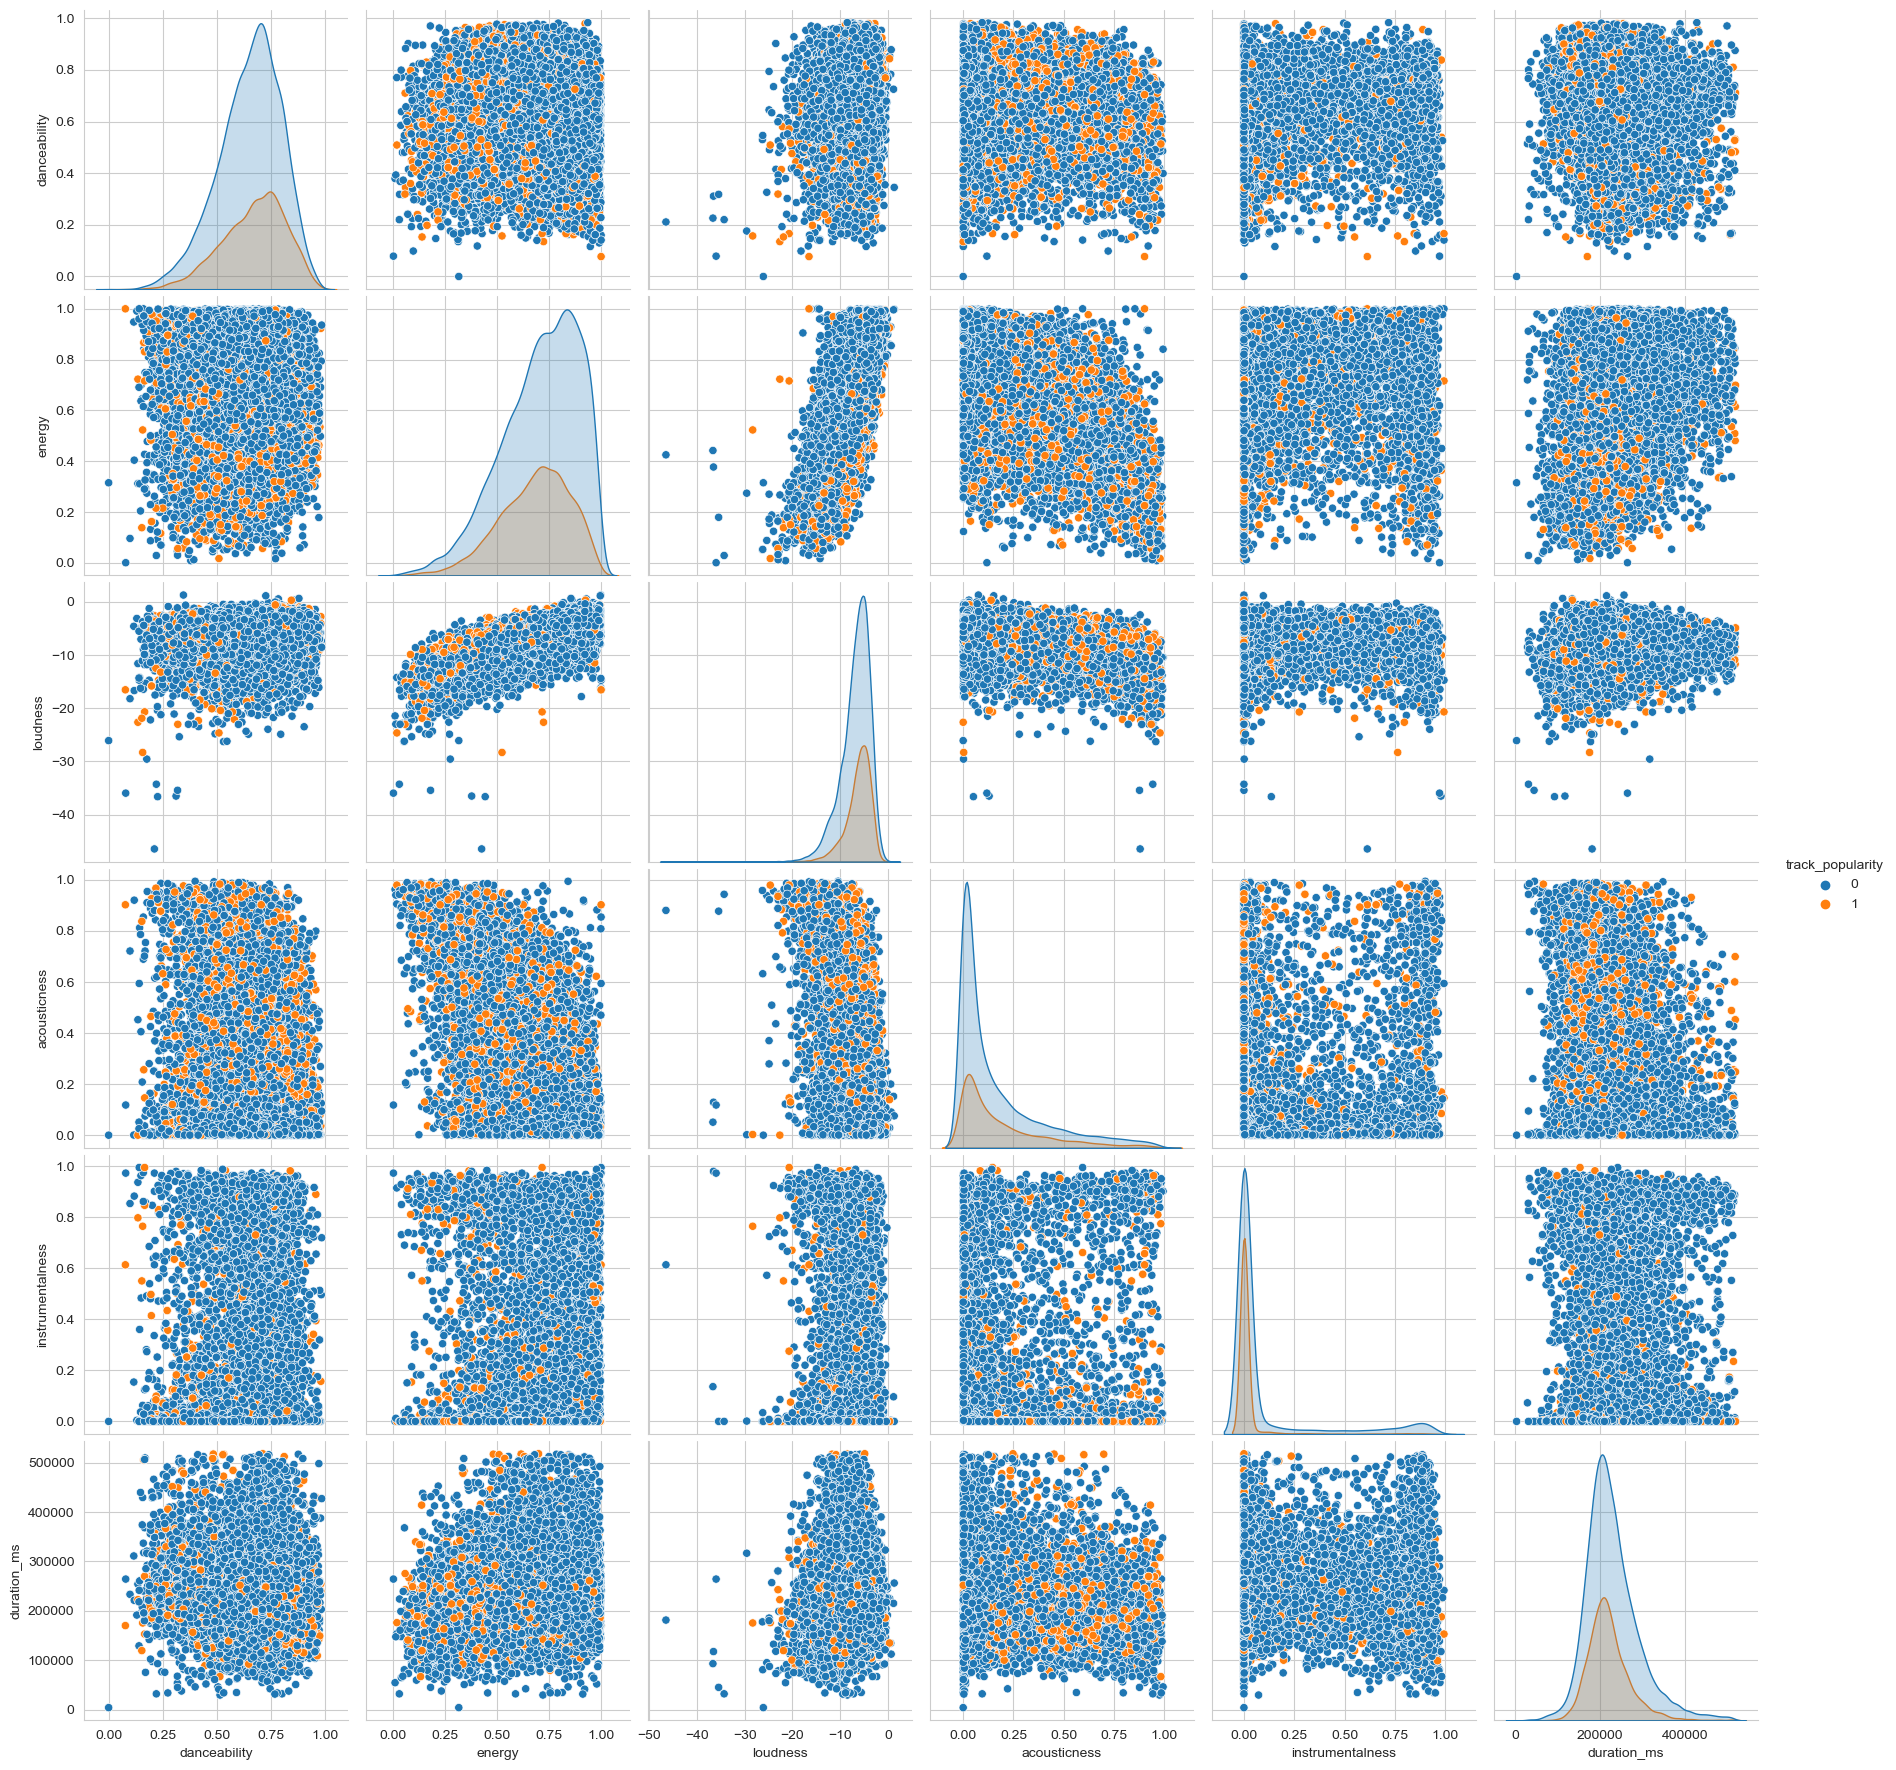

In [53]:
#drop some features to reduce complexity
data = data.copy().drop(columns=['liveness','speechiness','tempo','valence', 'key', 'mode'])
sns.set_style("whitegrid");
sns.pairplot(data, height=3, hue = "track_popularity");
plt.show()

The relationships between the target and feature variables are nonlinear throughout.